In [ ]:
#Download files from kaggle to aws
# !ssh ubuntu@myaws

In [1]:
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile
import joblib
import matplotlib.pyplot as plt

In [12]:
def import_zipfiles_to_df(path):
    """
    import multiple zipfiles and combine into one dataframe
    path = where the file located
    """
    path = path
    zip_file = ZipFile(path)
    files = zip_file.infolist()
    files.pop(0) #remove first item (folder name)

    #create first dataframe to append later
    file1 = files.pop(0)
    df= pd.read_csv(zip_file.open(file1.filename),dtype = 'object') 

    #add block column = file name
    name = file1.filename.split('/')[1]
    name = name.split('.')[0]
    df['block'] = name

    for file in files:
#         print(file.filename)
        df_1= pd.read_csv(zip_file.open(file.filename), dtype = 'object')
        name = file.filename.split('/')[1]
        name = name.split('.')[0]
        df_1['block'] = name
        df = pd.concat([df, df_1])
    return df

In [38]:
#pcike function
def pickleFile(filetopickle, file_path):
        
    joblib.dump(filetopickle, file_path)
 
    return print('File is picked at below path: \n', file_path)

In [2]:
#load pickle file
def loadpickle(file_path):
    
    return joblib.load(file_path)  

In [13]:
# import data
folder_path = '/Users/vsu/Metis/04_Metis_Projects/05_Project05/Data/smart-meters-in-london'

for file in os.listdir(folder_path):
    if str(file).endswith(('csv', 'zip')):
        
        file_name = str(file).split('.')[0] + '_df'
        path = folder_path + '/' + file
        
        if str(file).split('.')[-1]!='csv': #.zip and .gz files
            locals()[file_name] = import_zipfiles_to_df(path)


        else: #.csv files
            locals()[file_name]= pd.read_csv(path, dtype= 'object' )

In [14]:
%whos

Variable                     Type         Data/Info
---------------------------------------------------
ZipFile                      type         <class 'zipfile.ZipFile'>
acorn_details_df             DataFrame        MAIN CATEGORIES      <...>\n[826 rows x 20 columns]
daily_dataset_df             DataFrame               LCLid         <...>510433 rows x 10 columns]
file                         str          weather_hourly_darksky.csv
file_name                    str          weather_hourly_darksky_df
folder_path                  str          /Users/vsu/Metis/04_Metis<...>ta/smart-meters-in-london
halfhourly_dataset_df        DataFrame                 LCLid       <...>7817021 rows x 4 columns]
hhblock_dataset_df           DataFrame               LCLid         <...>469352 rows x 51 columns]
import_zipfiles_to_df        function     <function import_zipfiles_to_df at 0x3d5cd0950>
informations_households_df   DataFrame              LCLid stdorToU <...>\n[5566 rows x 5 columns]
np           

In [317]:
# #pickle add dataframes
# pickleFile(acorn_details_df, './Pickle/acorn_details.pickle')
# pickleFile(daily_dataset_df, './Pickle/daily_dataset.pickle')
# pickleFile(halfhourly_dataset_df, './Pickle/halfhourly_dataset.pickle')
# pickleFile(hhblock_dataset_df, './Pickle/hhblock_dataset.pickle')
# pickleFile(informations_households_df, './Pickle/informations_households.pickle')
# pickleFile(uk_bank_holidays_df, './Pickle/uk_bank_holidays.pickle')
# pickleFile(weather_daily_darksky_df, './Pickle/weather_daily_darksky.pickle')
# pickleFile(weather_hourly_darksky_df, './Pickle/weather_hourly_darksky.pickle')

In [159]:
#load pick files
acorn_details_df = loadpickle('./Pickle/acorn_details.pickle')
# daily_dataset_df = loadpickle('./Pickle/daily_dataset.pickle')
halfhourly_dataset_df = loadpickle('./Pickle/halfhourly_dataset.pickle')
hhblock_dataset_df = loadpickle('./Pickle/hhblock_dataset.pickle')
informations_households_df = loadpickle('./Pickle/informations_households.pickle')
# uk_bank_holidays_df = loadpickle('./Pickle/uk_bank_holidays.pickle')
# weather_daily_darksky_df = loadpickle('./Pickle/weather_daily_darksky.pickle')
# weather_hourly_darksky_df = loadpickle('./Pickle/weather_hourly_darksky.pickle')

# Population 

In [163]:
# halfhourly_dataset_df

In [164]:
# hhblock_dataset_df

In [165]:
# acorn_details_df

In [166]:
# informations_households_df

In [167]:
hhblock_info = hhblock_dataset_df.merge(informations_households_df, on= 'LCLid')

In [ ]:
# hhblock_info.info()

In [168]:
hhblock_info.head(5)

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_43,hh_44,hh_45,hh_46,hh_47,block,stdorToU,Acorn,Acorn_grouped,file
0,MAC000002,2012-10-13,0.263,0.26899999999999996,0.275,0.256,0.21100000000000002,0.136,0.161,0.11900000000000001,...,0.233,0.235,0.188,0.259,0.25,block_0,Std,ACORN-A,Affluent,block_0
1,MAC000002,2012-10-14,0.262,0.166,0.226,0.08800000000000001,0.126,0.08199999999999999,0.12300000000000001,0.083,...,0.511,0.231,0.21,0.278,0.159,block_0,Std,ACORN-A,Affluent,block_0
2,MAC000002,2012-10-15,0.192,0.09699999999999999,0.141,0.083,0.132,0.07,0.13,0.07400000000000001,...,0.33399999999999996,0.299,0.23600000000000002,0.24100000000000002,0.237,block_0,Std,ACORN-A,Affluent,block_0
3,MAC000002,2012-10-16,0.237,0.237,0.193,0.11800000000000001,0.098,0.107,0.094,0.109,...,0.21100000000000002,0.188,0.213,0.157,0.20199999999999999,block_0,Std,ACORN-A,Affluent,block_0
4,MAC000002,2012-10-17,0.157,0.21100000000000002,0.155,0.16899999999999998,0.10099999999999999,0.11699999999999999,0.084,0.11800000000000001,...,0.377,0.327,0.27699999999999997,0.28800000000000003,0.256,block_0,Std,ACORN-A,Affluent,block_0


In [169]:
#convert datatype
hhblock_info['day'] =pd.to_datetime(hhblock_info['day'])
hhblock_info = hhblock_info[['LCLid','day','Acorn','stdorToU','block','Acorn_grouped']].join(
    hhblock_info.iloc[:,2:50].astype(float))

In [170]:
#bin to hour
for x in range(0,24):
    hour = 'H'+str(x)
    hhblock_info[hour] = hhblock_info.iloc[:,6+x] + hhblock_info.iloc[:,6+x+1]

In [171]:
hhblock_info.columns[6:54]

Index(['hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6', 'hh_7', 'hh_8',
       'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14', 'hh_15', 'hh_16',
       'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22', 'hh_23', 'hh_24',
       'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30', 'hh_31', 'hh_32',
       'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38', 'hh_39', 'hh_40',
       'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46', 'hh_47'],
      dtype='object')

In [172]:
hhblock_info = hhblock_info.drop(columns= hhblock_info.columns[6:54])

In [173]:
hhblock_agg = hhblock_info.groupby(['Acorn', 'Acorn_grouped','stdorToU','day']).mean().reset_index()

In [174]:
hhblock_agg.head()

,Acorn,Acorn_grouped,stdorToU,day,H0,H1,H2,H3,H4,H5,...,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23
0,ACORN-,ACORN-,ToU,2012-04-18,0.170,0.128,0.098,0.119,0.144,0.144,...,0.163,0.408,0.413,0.237,0.188,0.101,0.232,0.356,0.324,0.279
1,ACORN-,ACORN-,ToU,2012-04-19,0.221,0.182,0.137,0.103,0.122,0.147,...,0.408,0.508,0.365,0.312,0.207,0.217,0.301,0.237,0.124,0.209
2,ACORN-,ACORN-,ToU,2012-04-20,0.184,0.113,0.104,0.151,0.163,0.117,...,0.586,0.436,0.360,0.286,0.187,0.171,0.176,0.345,0.383,0.378
3,ACORN-,ACORN-,ToU,2012-04-21,0.209,0.191,0.148,0.122,0.132,0.150,...,0.148,0.380,0.444,0.285,0.297,0.298,0.238,0.181,0.285,0.514
4,ACORN-,ACORN-,ToU,2012-04-22,0.229,0.141,0.112,0.129,0.180,0.163,...,0.152,0.091,0.445,0.477,0.187,0.255,0.270,0.250,0.371,0.577


In [175]:
hhblock_agg['day_of_week'] = hhblock_agg.day.dt.dayofweek

In [176]:
hh_a =hhblock_agg[(hhblock_agg.Acorn =='ACORN-A') & 
            (hhblock_agg.Acorn_grouped =='Affluent')& (hhblock_agg.stdorToU =='Std')].reset_index()

In [177]:
hh_a.describe()

,index,H0,H1,H2,H3,H4,H5,H6,H7,H8,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,day_of_week
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,...,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,958.000000,0.633706,0.572078,0.527024,0.495767,0.472694,0.455172,0.444853,0.443272,0.447962,...,0.809244,0.838251,0.857224,0.859290,0.849075,0.838043,0.830377,0.828355,0.828458,2.996328
std,235.991878,0.144241,0.132736,0.109855,0.097900,0.088340,0.083512,0.080126,0.074030,0.071998,...,0.168392,0.165159,0.170264,0.181041,0.185967,0.182943,0.185992,0.185478,0.200668,2.002140
min,550.000000,0.273000,0.242000,0.209000,0.136000,0.108000,0.084000,0.089000,0.080000,0.076000,...,0.218000,0.403875,0.264000,0.064000,0.074000,0.066000,0.110000,0.120000,0.088000,0.000000
25%,754.000000,0.516856,0.478629,0.445278,0.425919,0.410870,0.399664,0.392769,0.395561,0.406784,...,0.707509,0.723088,0.726247,0.713402,0.703921,0.700798,0.699136,0.699422,0.694649,1.000000
50%,958.000000,0.618880,0.556757,0.511528,0.482032,0.461188,0.451192,0.442088,0.442066,0.448247,...,0.809095,0.828935,0.844719,0.850370,0.831135,0.812480,0.805757,0.805302,0.814519,3.000000
75%,1162.000000,0.727690,0.642726,0.587914,0.544225,0.517342,0.501582,0.493757,0.490483,0.491045,...,0.930880,0.956112,0.987457,1.010358,0.994038,0.972940,0.957553,0.947283,0.946267,5.000000
max,1366.000000,1.519000,2.130000,1.381000,1.294000,1.365000,1.022833,1.122167,0.740000,0.705000,...,1.269381,1.307593,1.309153,1.734000,2.146000,1.629943,1.685094,1.665453,2.903000,6.000000


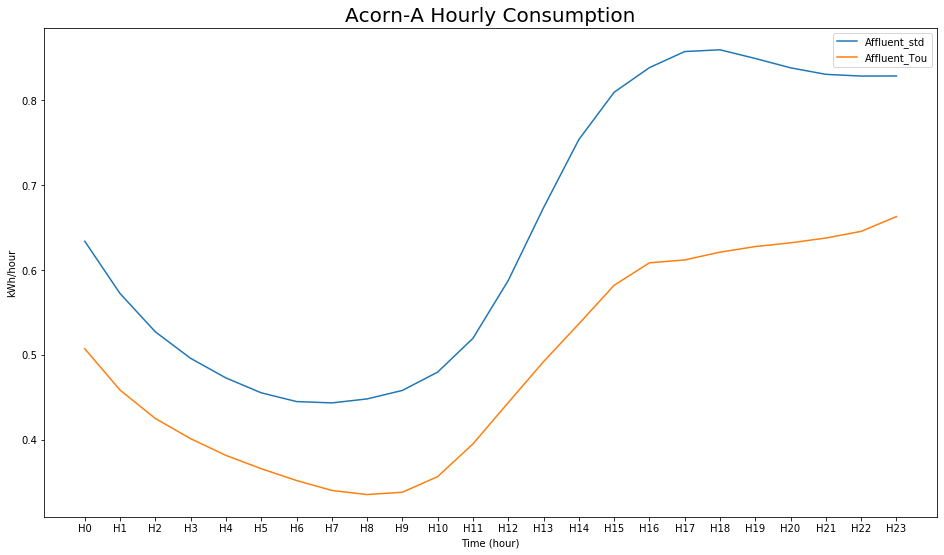

In [180]:
plt.figure(figsize = (16,9))
hh_a =hhblock_agg[(hhblock_agg.Acorn =='ACORN-A') & 
            (hhblock_agg.Acorn_grouped =='Affluent')& (hhblock_agg.stdorToU =='Std')].reset_index()

plt.plot(hh_a.loc[:,'H0':'H23'].mean(), label = 'Affluent_std');

hh_a_ToU =hhblock_agg[(hhblock_agg.Acorn =='ACORN-A') & 
            (hhblock_agg.Acorn_grouped =='Affluent')& (hhblock_agg.stdorToU =='ToU')].reset_index()

plt.plot(hh_a_ToU.loc[:,'H0':'H23'].mean(), label = 'Affluent_Tou');
plt.xlabel('Time (hour)')
plt.ylabel('kWh/hour')
plt.legend();
plt.title('Acorn-A Hourly Consumption', fontsize = 20);


In [181]:
Acorn_ls= list(hhblock_agg.Acorn.unique())
Acorn_ls.pop(0)

'ACORN-'

In [135]:
len(Acorn_ls)

18

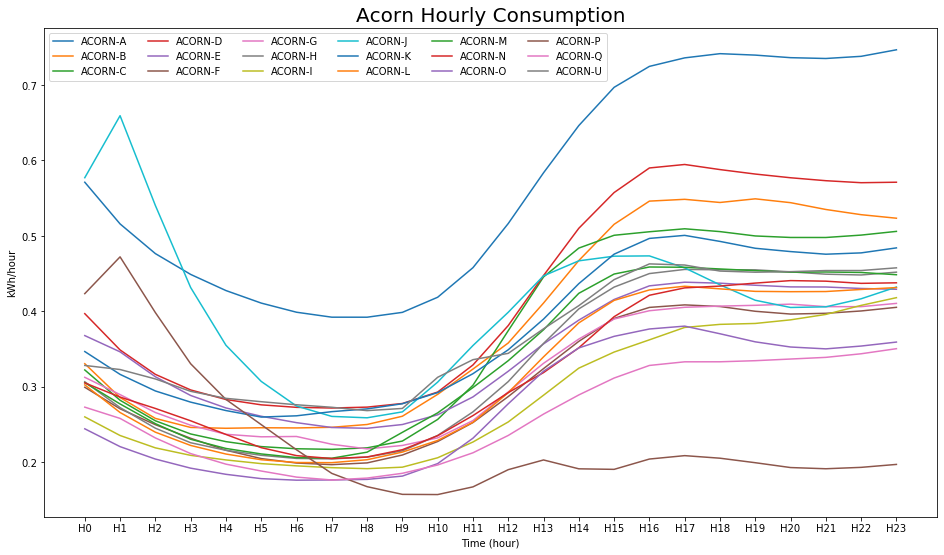

In [182]:
# Hourly Consumption for all Acorns

plt.figure(figsize = (16,9))
for acorn in Acorn_ls:

    df =hhblock_agg[(hhblock_agg.Acorn == acorn)].reset_index()

    plt.plot(df.loc[:,'H0':'H23'].mean(), label = acorn)

plt.xlabel('Time (hour)')
plt.ylabel('kWh/hour')
plt.legend(ncol = 6)
plt.title('Acorn Hourly Consumption', fontsize = 20);


In [189]:
Acorn_grouped = list(hhblock_agg.Acorn_grouped.unique())
Acorn_grouped.remove('ACORN-')
Acorn_grouped.remove('ACORN-U')

In [184]:
hh_acorn_grouped =hhblock_agg.groupby(['Acorn_grouped','stdorToU']).mean().reset_index()

In [185]:
hh_acorn_grouped

,Acorn_grouped,stdorToU,H0,H1,H2,H3,H4,H5,H6,H7,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,day_of_week
0,ACORN-,ToU,0.352509,0.328365,0.296681,0.261757,0.241865,0.237646,0.234430,0.233147,...,0.399317,0.427377,0.448460,0.469344,0.457766,0.442798,0.446742,0.449511,0.441028,2.992727
1,ACORN-U,Std,0.413071,0.428442,0.420145,0.393473,0.367626,0.352003,0.344429,0.339736,...,0.435857,0.462986,0.460338,0.459404,0.463847,0.466041,0.476570,0.483537,0.487812,3.000000
2,ACORN-U,ToU,0.242548,0.216147,0.199403,0.193409,0.200892,0.207736,0.207210,0.205284,...,0.448323,0.462807,0.462457,0.447270,0.439762,0.439006,0.431277,0.424299,0.427148,2.996264
3,Adversity,Std,0.356011,0.350385,0.311363,0.277470,0.252021,0.232832,0.220153,0.214133,...,0.366679,0.380894,0.384622,0.381489,0.379914,0.377410,0.376522,0.381557,0.386080,2.998952
4,Adversity,ToU,0.271484,0.247239,0.227954,0.213626,0.204398,0.198255,0.193710,0.190036,...,0.375816,0.393959,0.399338,0.395335,0.389403,0.387740,0.387021,0.385207,0.387315,2.998389
5,Affluent,Std,0.430610,0.390834,0.356197,0.332199,0.316259,0.306227,0.299893,0.296916,...,0.555733,0.573774,0.582269,0.583666,0.582734,0.582974,0.582605,0.583153,0.584904,2.998283
6,Affluent,ToU,0.365548,0.321585,0.292352,0.275191,0.266126,0.259747,0.255143,0.252480,...,0.517800,0.545183,0.547500,0.541873,0.537930,0.530599,0.525423,0.522802,0.524574,2.998237
7,Comfortable,Std,0.423035,0.441669,0.378753,0.324498,0.285014,0.261049,0.247691,0.239051,...,0.411201,0.425691,0.431316,0.432432,0.429868,0.426827,0.425980,0.428585,0.431375,2.999013
8,Comfortable,ToU,0.280672,0.250677,0.230402,0.215230,0.206339,0.200668,0.195857,0.192806,...,0.403669,0.413065,0.412458,0.403235,0.395698,0.394669,0.396327,0.403316,0.415933,2.998489


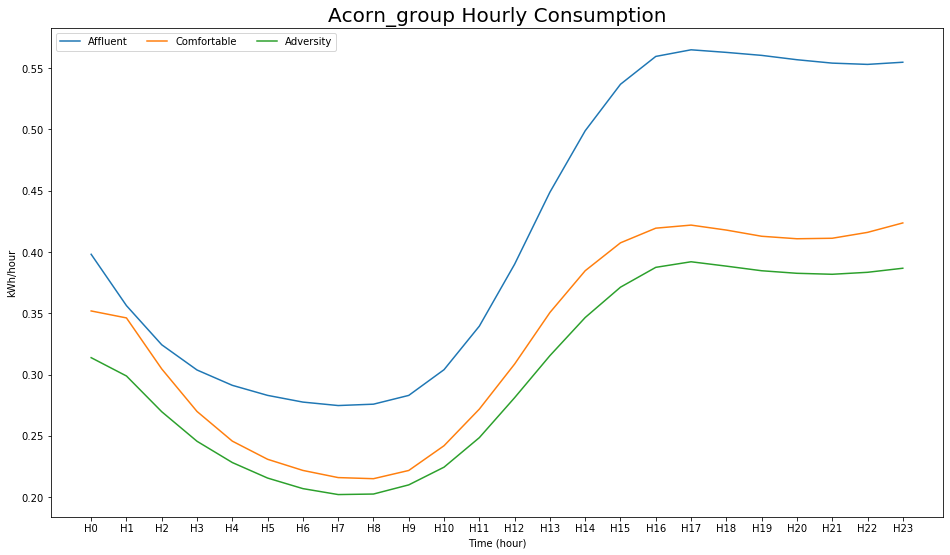

In [192]:
plt.figure(figsize = (16,9))
for group in Acorn_grouped:

    df =hh_acorn_grouped[(hh_acorn_grouped.Acorn_grouped == group)].reset_index()

    plt.plot(df.loc[:,'H0':'H23'].mean(), label = group)

plt.xlabel('Time (hour)')
plt.ylabel('kWh/hour')
plt.legend(ncol = 6)
plt.title('Acorn_group Hourly Consumption', fontsize = 20);
plt.savefig('./Figs/Acorn_gourp_Hourly_consumption.SVG');